## Project 2 

The goal of this project is to look at a set of video game data ranging from 1985-2016. We'll conduct an exploratory analysis in order to see what interesting questions we can ask about the data set and the video game indsutry as a whole. 


The question: Why were there so many titles released during the 2007-2010 era and what could have driven that number to be so high? 

In [3]:
# Different libraries used
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
#Import the data 

gameData = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

gameData

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


At a glance, we can see that we have a variety of columns that contain information such as the name of the video game, the platform it was released on, the year of release, and other information such as sales in different countries. 

In order to proceed with the analysis, we will check for any NaN/null values in the data. If you look at the chart it is obvious that there is missing data BUT it is always good to check in case you don't see anything at a glance. 

In [5]:
#Checks if there are any NaN vals in data

gameData.isnull().any().any()

True

In [6]:
#Checks if col is object/float 

gameData.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

By looking at the each columns "type", we can see that "User_Score" is in fact an object type when it should be in float64 (In other words, it should only contain numeric values). We'll fix that in the next section by converting it into a complete string type.


In [7]:
#Drops rows with 'tbd' in them for User_Score
gameData.drop(gameData[gameData['User_Score'] == "tbd"].index, inplace = True)

Through some of my own experimentation, I found that one of the strings in the column was 'tbd'. I went ahead and removed that although there seem to be other types of string beyond 'tbd' in the column. 

# Data Preperation & Cleaning

If you look at the above chart, we can see that there is a good amount of missing data in the form of the NaN values found accross the different rows. Since we cannot work with NaN values in later analyzes, we'll start by cleaning up those missing values. 

In [8]:
#Drop NaN vals from data

gameData = gameData.dropna()


In [9]:
#Removes warning given from running next line
pd.options.mode.chained_assignment = None  # default='warn'

#converts user_score from str to numeric type
gameData['User_Score'] = pd.to_numeric(gameData['User_Score'])







Our new chart only has 6,825 in comparison to the 16,719 we had previously. I don't need to tell you how large of a dip that is in our data set which really comes to show us how messy data is in the real world. 

Furthermore, now that we have gotten rid of NaN vals, we can convert the User_Score column into a numeric type.

In [10]:
gameData["Platform"].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

As we can see, there are a variety of consoles. We will be working primarily with the 6th, 7th, and 8th generations of consoles but more on that later. 

## Analysis (Tables)

In [11]:
gameData.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


At the top I have computed a few summary statistics of some of the quantitative columns in the data set. 

At a glance, we can see some interesting things such as the fact that the mean year of release for the games in our list was 2007. Does this mean the person who sampled mainly picked games from that year or did the gaming industry just have a very productive year in 2007? Regardless, it is an interesting observation. 

The average critic score being 70 and the std being around 13.86 are also interesting insights. Are video games mostly considered to be "average" by critics? 


In [12]:
#Creates an empty list for quantitative cols
L = []

#for each val in a given col...
for colname, colval in gameData.iteritems():
    
    #if the val in col is not a str type
    if type(colval[2]) != str: 
        
        L.append(colname)

        


We have now created a list of all of the columns with quantitative values in the data set. The reason we want to do this is because we are going to begin working with data that has quantitative values and not qualitiative columns such as Publisher. 

Below this I have created a new variable called 'quantGame' which is composed of only the quantitaitve columns. 

In [13]:
quantGame = gameData[L]

quantGame

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
6,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0
7,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0
...,...,...,...,...,...,...,...,...,...,...
16667,2001.0,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0
16677,2002.0,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0
16696,2014.0,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0
16700,2011.0,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0


Now that we have our quantifiable columns seperated, let's create a heat map in order to take a look at what correlations exist and how strong they are. 

Below I have also printed out the r correlation for each set of columns

In [18]:
print(quantGame.corr())

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.016239  0.041346 -0.038443     0.042315   
NA_Sales               -0.016239  1.000000  0.841808  0.468607     0.726757   
EU_Sales                0.041346  0.841808  1.000000  0.519929     0.716330   
JP_Sales               -0.038443  0.468607  0.519929  1.000000     0.394823   
Other_Sales             0.042315  0.726757  0.716330  0.394823     1.000000   
Global_Sales            0.006661  0.955793  0.939313  0.613546     0.804028   
Critic_Score           -0.007661  0.233580  0.213102  0.147314     0.191509   
Critic_Count            0.203336  0.283917  0.265740  0.168299     0.239513   
User_Score             -0.253914  0.085796  0.055915  0.127521     0.057083   
User_Count              0.199348  0.246208  0.283504  0.072773     0.240085   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release      0.006661     -0.007661      0.203336

<AxesSubplot:>

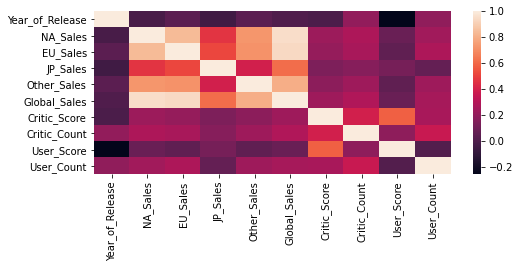

In [22]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.heatmap(quantGame.corr())

Based off of the correlations and heat map, there do not seem to be many interesting correlations that we can pick at. There were some strong correlations between sales in different countries however. 

# Visualizations

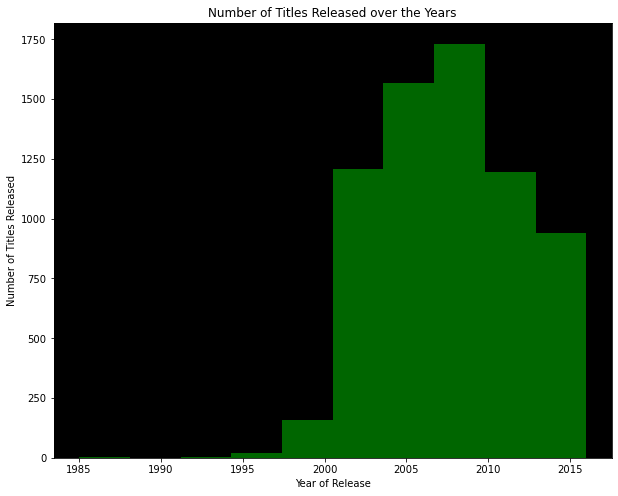

In [43]:
f, ax = plt.subplots(figsize=(10, 8))


ax.hist(quantGame["Year_of_Release"], alpha = 0.8, color = "green")

ax.set(xlabel= "Year of Release", ylabel = "Number of Titles Released")
ax.set_title("Number of Titles Released over the Years")
ax.set_facecolor("black")
  
    
plt.show()



Judging from the histogram above it seems as though many game releases did occur between 2005-2009ish with the peak being around 2007 as shown in one of the tables created earlier. What could have driven this number to be so high? Before we answer this, it may be a smart move to look at other factors first such as sales in different countries over the years. How did games in other countries do? 

Next graph can look at the years and how game sales in different countries go up? Take a look at critic/user scores to see if this drove game sales? Maybe look at individual console games and how they sold? 